# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# to show to all columns
pd.set_option('display.max_columns', None)

# Data Gathering

In [2]:
df = pd.read_csv("ECOMM SALES DATA.xlsx.csv")

# Data Cleaning

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31/7/2012,31/7/2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,10024.0,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,5/2/2013,7/2/2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,NaN,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17/10/2013,18/10/2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,NaN,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28/1/2013,30/1/2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,NaN,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,5/11/2013,6/11/2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,NaN,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [4]:
df.shape

(51290, 24)

In [5]:
# checking for null values
df.isna().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [6]:
# checking DataTypes
df.dtypes

Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
City               object
State              object
Country            object
Postal Code       float64
Market             object
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
dtype: object

In [7]:
# changing Order Date and Ship Date into DataTime format
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Ship Date"] = pd.to_datetime(df["Ship Date"])

C:\Users\HP\AppData\Local\Temp\ipykernel_2824\4182902821.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Order Date"] = pd.to_datetime(df["Order Date"])
C:\Users\HP\AppData\Local\Temp\ipykernel_2824\4182902821.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Ship Date"] = pd.to_datetime(df["Ship Date"])


In [8]:
# Extracting Yeara and Month fomrthe Order Date
df["Order Year"] = df["Order Date"].dt.year
df["Order Month"] = df["Order Date"].dt.month

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

# Statistical Analysis

In [10]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost,Order Year,Order Month
count,51290.00000,51290,51290,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,2013-05-11 21:26:49.155781120,2013-05-15 20:42:42.745174528,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915,2012.777208,7.522636
min,1.00000,2011-01-01 00:00:00,2011-01-03 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000,2011.000000,1.000000
25%,12823.25000,2012-06-19 00:00:00,2012-06-23 00:00:00,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000,5.000000
50%,25645.50000,2013-07-08 00:00:00,2013-07-12 00:00:00,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000,8.000000
75%,38467.75000,2014-05-22 00:00:00,2014-05-26 00:00:00,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000,10.000000
max,51290.00000,2014-12-31 00:00:00,2015-01-07 00:00:00,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000,12.000000
std,14806.29199,NaN,NaN,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804,1.098931,3.300056


# EDA

### Relationship between Quantity ordered per year

In [11]:
quantity_per_year = df.groupby("Order Year")["Quantity"].sum().reset_index()

In [12]:
quantity_per_year

,Order Year,Quantity
0,2011,31443
1,2012,38111
2,2013,48136
3,2014,60622


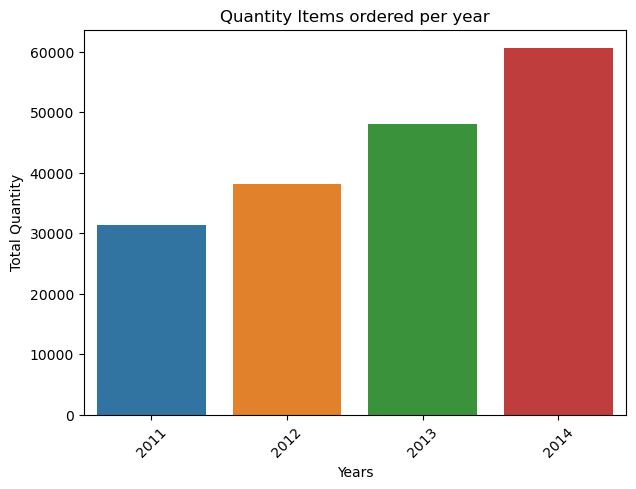

In [13]:
plt.figure(figsize=(7,5))
sns.barplot(x="Order Year", y="Quantity", data=quantity_per_year)
plt.title("Quantity Items ordered per year")
plt.xlabel("Years")
plt.ylabel("Total Quantity")
plt.xticks(rotation=45)
plt.show()

### Total Sales per year

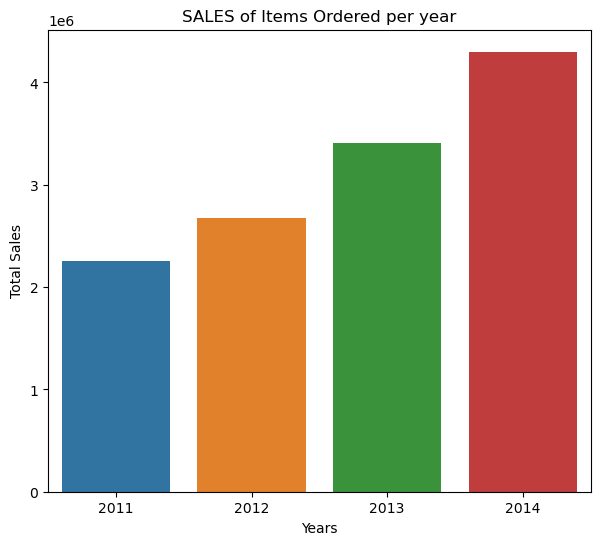

In [14]:
sales_per_year = df.groupby("Order Year")["Sales"].sum().reset_index()

plt.figure(figsize=(7,6))
sns.barplot(x="Order Year", y="Sales", data=sales_per_year)
plt.title("SALES of Items Ordered per year")
plt.xlabel("Years")
plt.ylabel("Total Sales")
plt.show()

### Distribution of Sales

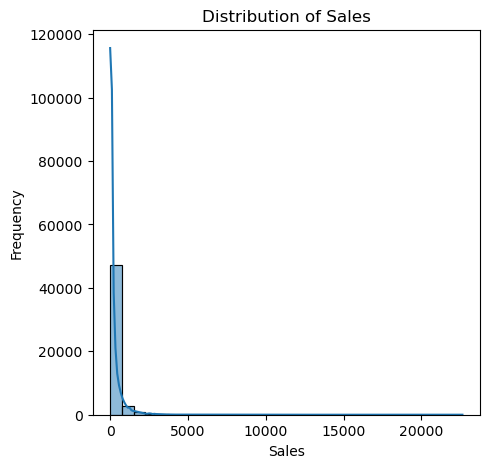

In [15]:
plt.figure(figsize=(5,5))
sns.histplot(df["Sales"], bins=30, kde=True)
plt.title("Distribution of Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

In [16]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Year,Order Month
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,10024.0,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,2012,7
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,NaN,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,2013,2
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,NaN,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,2013,10
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,NaN,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,2013,1
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,NaN,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,2013,11


### Relationship between Discount and Profit

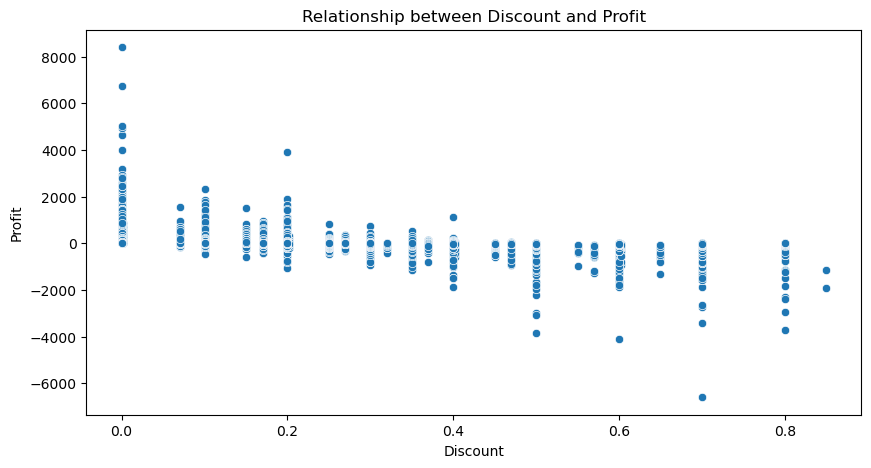

In [17]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x="Discount", y="Profit")
plt.title('Relationship between Discount and Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

### Sales By Market

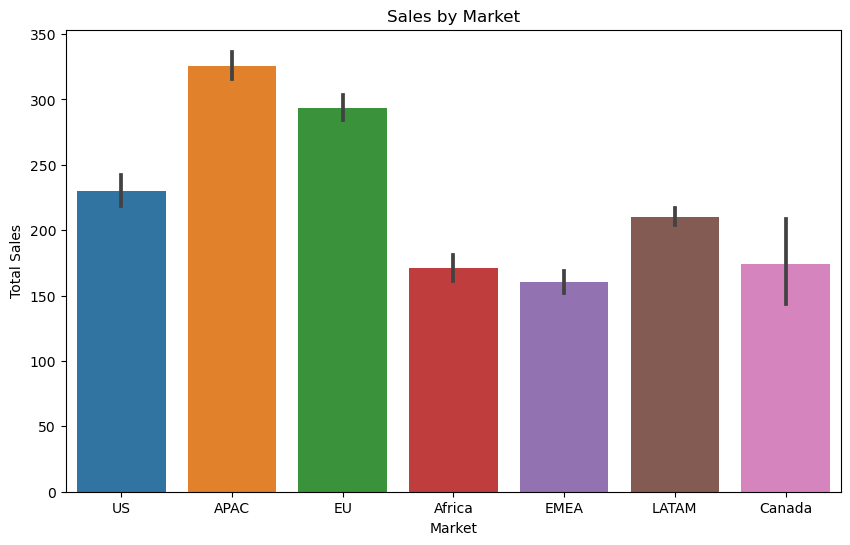

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Market', y='Sales')
plt.title('Sales by Market')
plt.xlabel('Market')
plt.ylabel('Total Sales')
plt.show()

### Profit Based on Category


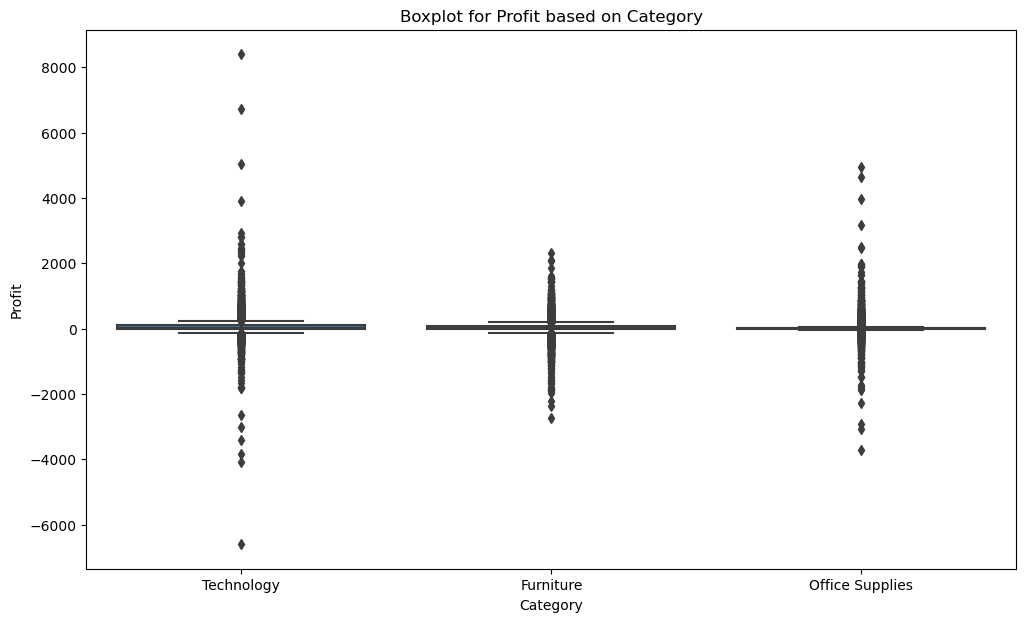

In [19]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Category', y='Profit', data=df)
plt.title('Boxplot for Profit based on Category')
plt.show()

### Sales Trend Over Time


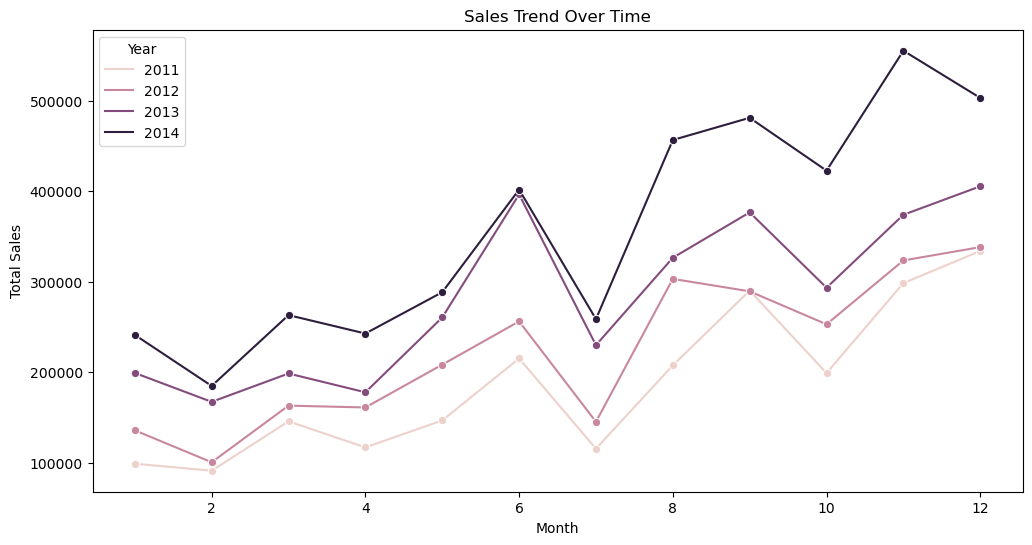

In [20]:
sales_by_month_year = df.groupby(['Order Year', 'Order Month'])['Sales'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=sales_by_month_year, x='Order Month', y='Sales', hue='Order Year', marker='o')
plt.title('Sales Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Year')
plt.show()

### Top 10 Best Selling Products

In [21]:
best_selling_products = df.groupby("Product Name")["Quantity"].sum().nlargest(10)
print("Top 10 Best Selling Products:-")
print()
print(best_selling_products)

Top 10 Best Selling Products:-

Product Name
Staples                                  876
Cardinal Index Tab, Clear                337
Eldon File Cart, Single Width            321
Rogers File Cart, Single Width           262
Sanford Pencil Sharpener, Water Color    259
Stockwell Paper Clips, Assorted Sizes    253
Avery Index Tab, Clear                   252
Ibico Index Tab, Clear                   251
Smead File Cart, Single Width            250
Stanley Pencil Sharpener, Water Color    242
Name: Quantity, dtype: int64


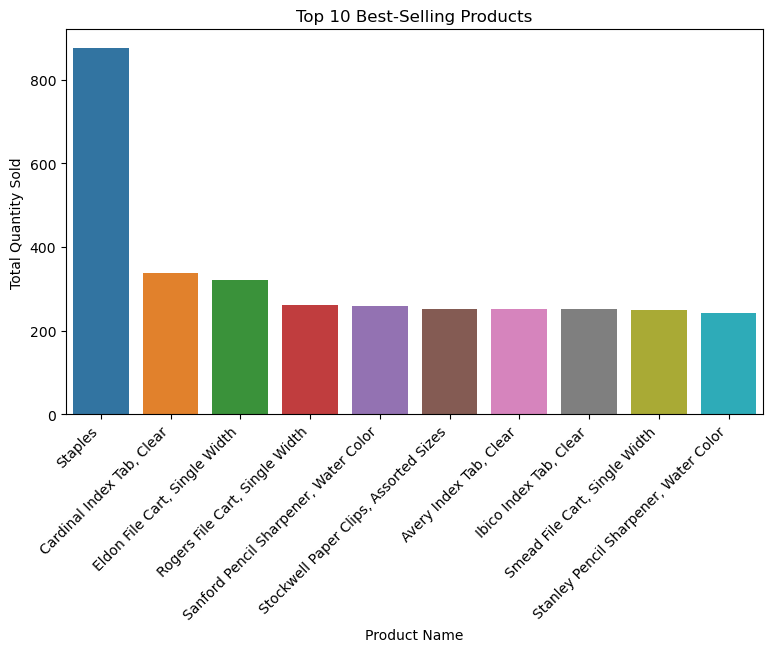

In [22]:
plt.figure(figsize=(9, 5))
sns.barplot(x=best_selling_products.index, y=best_selling_products.values)
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.show()

### Top 10 Best Selling Product According to Sales and Profit

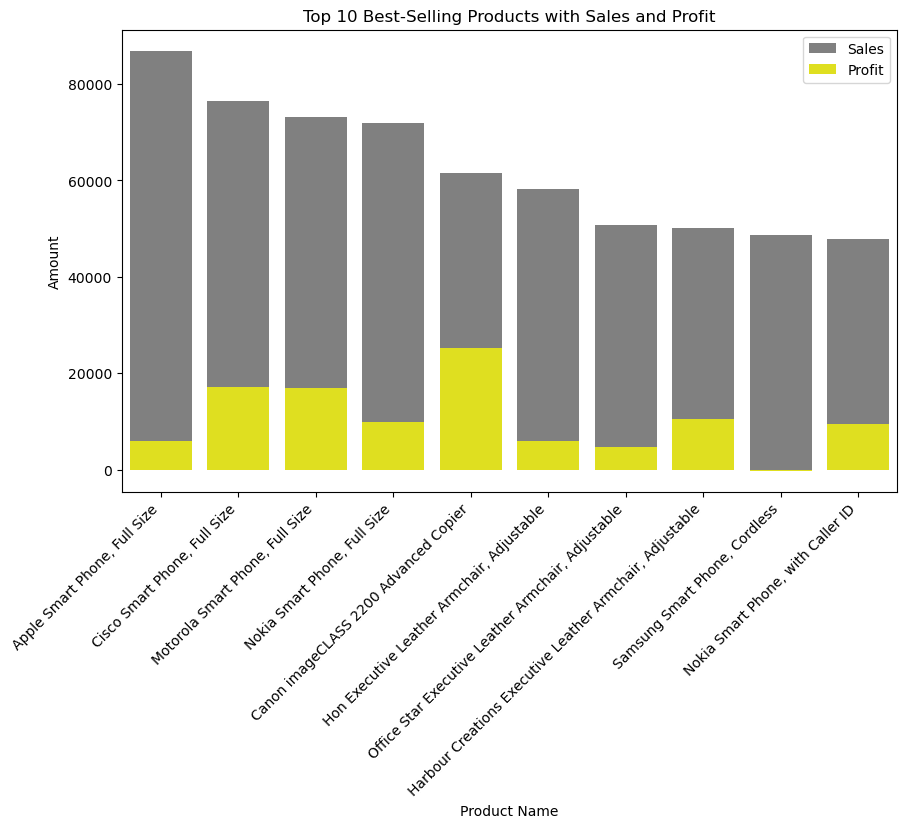

In [23]:
product_sales_profit = df.groupby('Product Name')[['Sales', 'Profit']].sum()

top_10_products = product_sales_profit.nlargest(10, 'Sales')

top_10_products = top_10_products.reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(x='Product Name', y='Sales', data=top_10_products, color='grey', label='Sales')
sns.barplot(x='Product Name', y='Profit', data=top_10_products, color='yellow', label='Profit')
plt.title('Top 10 Best-Selling Products with Sales and Profit')
plt.xlabel('Product Name')
plt.ylabel('Amount')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

# Sub-Category Analysis


In [24]:
db_sales = df.groupby("Sub-Category")["Sales"].sum()
db_quantity = df.groupby("Sub-Category")["Quantity"].sum()

In [25]:
db_quantity

Sub-Category
Accessories    10946
Appliances      6078
Art            16301
Binders        21429
Bookcases       8310
Chairs         12336
Copiers         7454
Envelopes       8380
Fasteners       8390
Furnishings    11225
Labels          9322
Machines        4906
Paper          12822
Phones         11870
Storage        16917
Supplies        8543
Tables          3083
Name: Quantity, dtype: int64

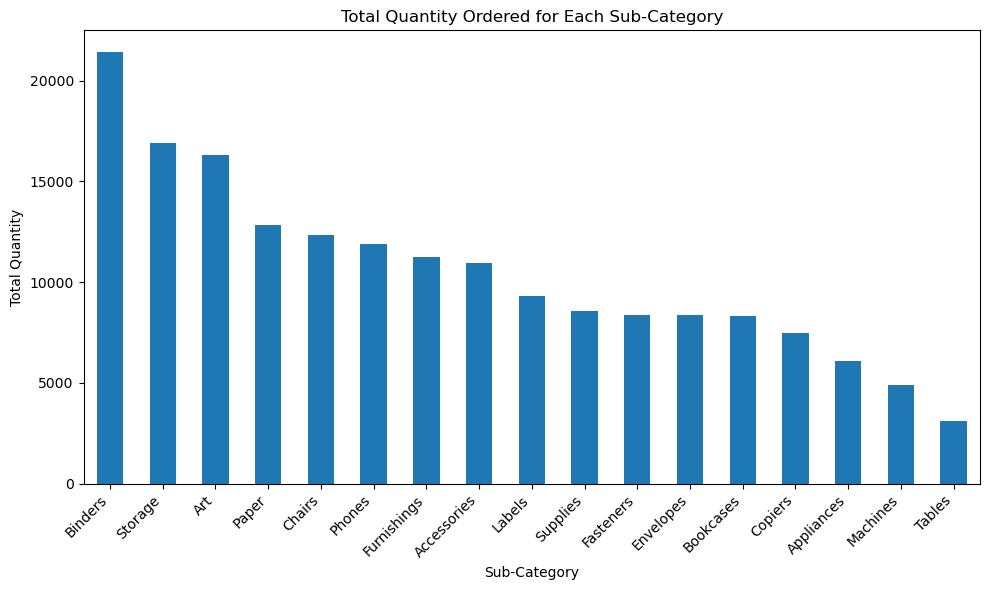

In [26]:
subcat_quantity = df.groupby('Sub-Category')['Quantity'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
subcat_quantity.plot(kind='bar')
plt.xlabel('Sub-Category')
plt.ylabel('Total Quantity')
plt.title('Total Quantity Ordered for Each Sub-Category')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()  
plt.show()

In [27]:
db_sales

Sub-Category
Accessories    7.492370e+05
Appliances     1.011064e+06
Art            3.720920e+05
Binders        4.619115e+05
Bookcases      1.466572e+06
Chairs         1.501682e+06
Copiers        1.509436e+06
Envelopes      1.709043e+05
Fasteners      8.324232e+04
Furnishings    3.855783e+05
Labels         7.340403e+04
Machines       7.790601e+05
Paper          2.442917e+05
Phones         1.706824e+06
Storage        1.127086e+06
Supplies       2.430742e+05
Tables         7.570419e+05
Name: Sales, dtype: float64

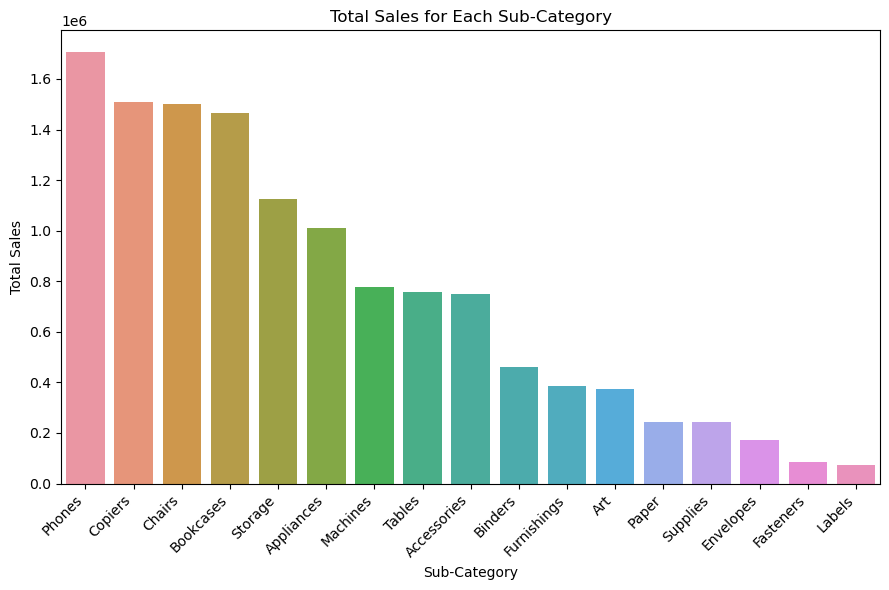

In [28]:
subcat_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(9, 6))
sns.barplot(x='Sub-Category', y='Sales', data=subcat_sales)
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales')
plt.title('Total Sales for Each Sub-Category')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()  
plt.show()

# Revenue Indicators

### Total Revenue Over Time (over Date)


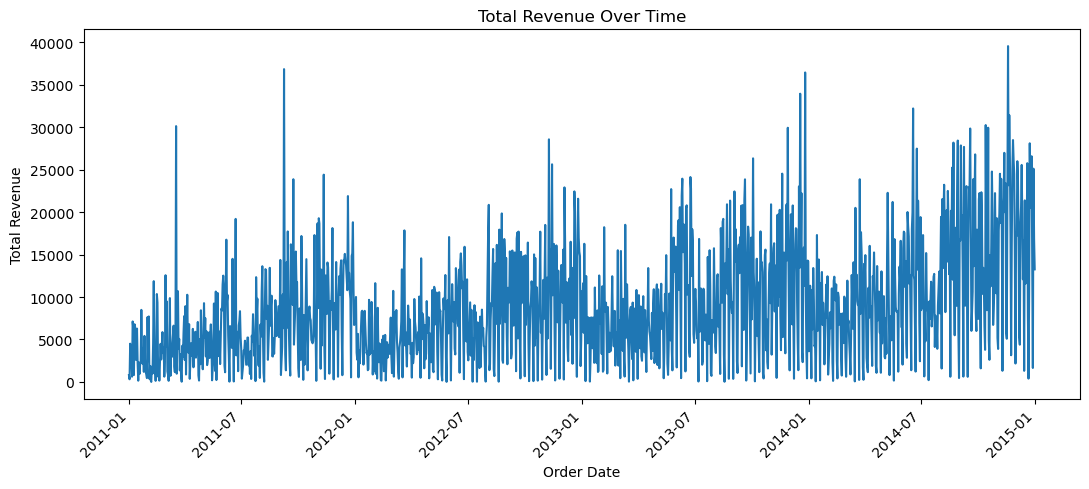

In [29]:
revenue_over_time = df.groupby('Order Date')['Sales'].sum()

plt.figure(figsize=(11, 5))
revenue_over_time.plot(kind='line')
plt.xlabel('Order Date')
plt.ylabel('Total Revenue')
plt.title('Total Revenue Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Total Revenue over Time (Over month)


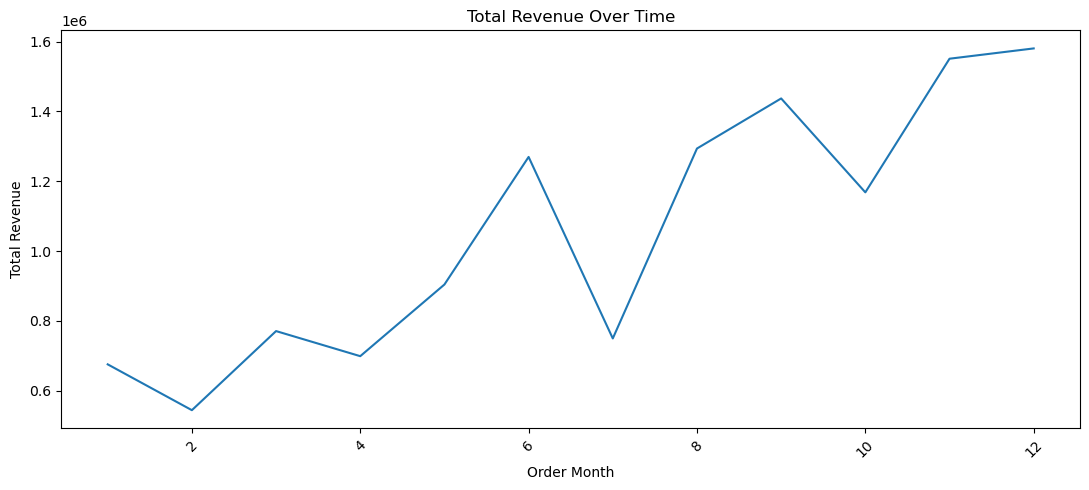

In [30]:
revenue_over_time = df.groupby('Order Month')['Sales'].sum()

plt.figure(figsize=(11, 5))
revenue_over_time.plot(kind='line')
plt.xlabel('Order Month')
plt.ylabel('Total Revenue')
plt.title('Total Revenue Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Revenue By Category


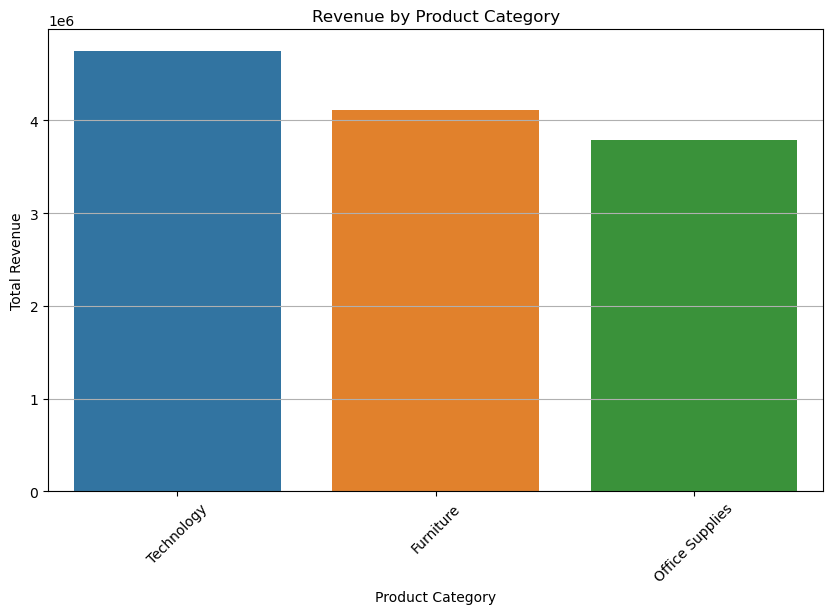

In [31]:
revenue_by_category = df.groupby('Category')['Sales'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Sales', data=revenue_by_category)
plt.title('Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y') 
plt.show()

## Revenue By Region


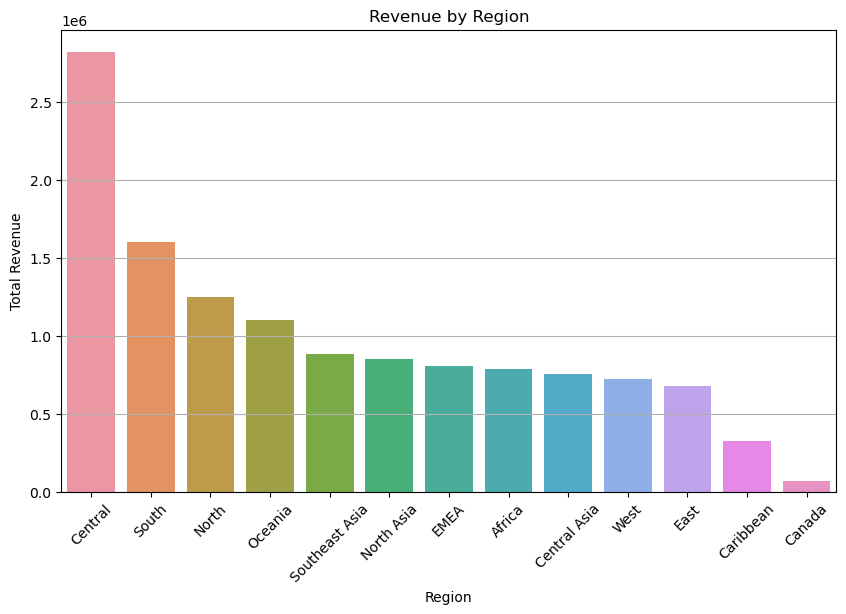

In [32]:
revenue_by_region = df.groupby('Region')['Sales'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Sales', data=revenue_by_region)
plt.title('Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y') 
plt.show()

## Average Order Value (AOV)

In [33]:
average_order_value = df['Sales'].mean()

print("Average Order Value (AOV): $", average_order_value)

Average Order Value (AOV): $ 246.49058120257362
